#2단계

데이터를 업로드합니다.

In [ ]:
from google.colab import files
myfile = files.upload()

Saving 공공자전거 대여소 정보.csv to 공공자전거 대여소 정보.csv


필요한 라이브러리를 불러옵니다.

In [ ]:
import pandas as pd

업로드한 데이터를 사용하기 위해 읽어보도록 하겠습니다.

In [ ]:
df = pd.read_csv("공공자전거 대여소 정보.csv", encoding='cp949')

In [ ]:
#불러온 데이터의 내용을 확인해보겠습니다.
#head()함수는 상위 일부 행의 데이터를 확인해볼 수 있는 함수입니다.
#head()함수의 기본값은 5입니다. 괄호 안에 숫자를 적지 않으면 기본 상위 5줄의 내용을 보여줍니다.
df.head()

,번호,보관소명,자치구,상세주소,위도,경도,설치시기,LCD거치대수,QR거치대수,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,11.0,11.0,QR


In [ ]:
#len 함수는 데이터셋이 총 몇 개의 행으로(데이터로) 이루어져 있는지 알려줍니다.
len(df)

2749

In [ ]:
#info 함수는 데이터 속성의 자료형과 자료 개수를 알려줍니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   번호       2749 non-null   int64  
 1   보관소명     2749 non-null   object 
 2   자치구      2749 non-null   object 
 3   상세주소     2749 non-null   object 
 4   위도       2749 non-null   float64
 5   경도       2749 non-null   float64
 6   설치시기     2749 non-null   object 
 7   LCD거치대수  1315 non-null   float64
 8   QR거치대수   1582 non-null   float64
 9   운영방식     2749 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 214.9+ KB


In [ ]:
#describe 함수는 데이터 갯수, 수치 데이터의 평균, 분산, 최솟값, 최댓값 등의 정보를 제공합니다.
df.describe()

,번호,위도,경도,LCD거치대수,QR거치대수
count,2749.000000,2749.000000,2749.000000,1315.000000,1582.000000
mean,2313.912332,37.547113,126.991448,12.457795,11.876106
std,1542.937782,0.052226,0.092810,4.800939,5.695395
min,102.000000,37.430977,126.798599,5.000000,3.000000
25%,996.000000,37.505016,126.914803,10.000000,10.000000
50%,2048.000000,37.545284,127.002838,10.000000,10.000000
75%,3707.000000,37.577202,127.063797,15.000000,15.000000
max,6054.000000,37.691013,127.180756,45.000000,55.000000


In [ ]:
#isna().sum()함수는 속성별 결측데이터의 갯수 정보를 제공합니다.
df.isna().sum()

번호            0
보관소명          0
자치구           0
상세주소          0
위도            0
경도            0
설치시기          0
LCD거치대수    1434
QR거치대수     1167
운영방식          0
dtype: int64

In [ ]:
#우리에게 필요한 속성인 위도, 경도 속성만 df1이라는 변수에 저장
df1 = df[['위도','경도']]

In [ ]:
df1.head()

,위도,경도
0,37.575794,126.971451
1,37.575947,126.974060
2,37.571770,126.974663
3,37.572559,126.978332
4,37.570000,126.971100


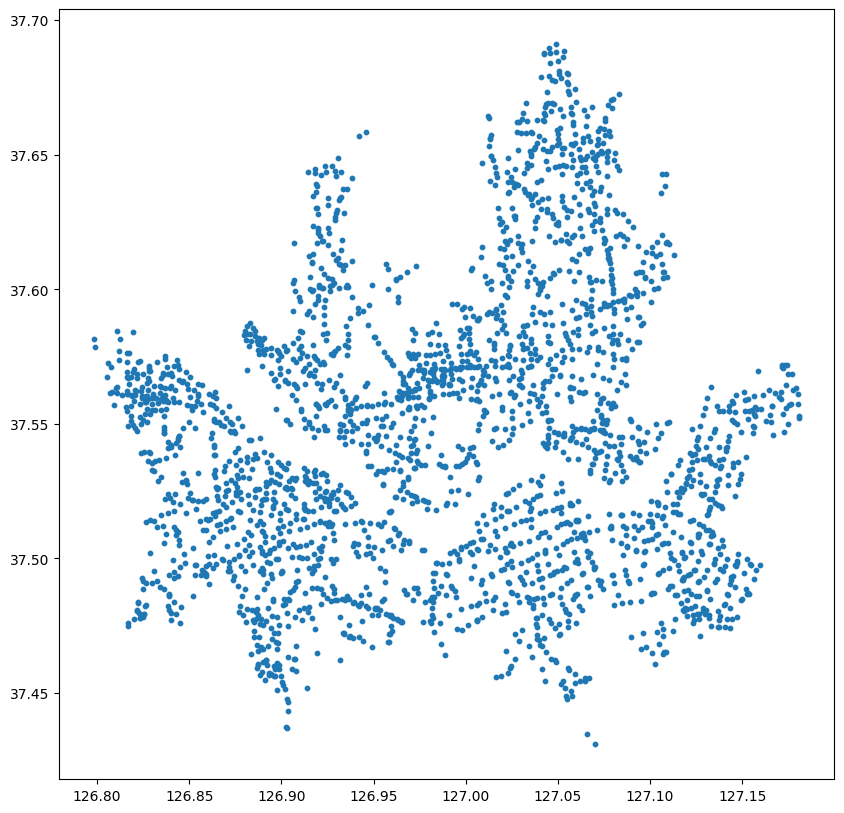

In [ ]:
import matplotlib.pyplot as plt

#전국 학교 산점도 분포 그래프 그리기
plt.figure(figsize=(10,10))
plt.scatter(df1['경도'], df1['위도'], s=10)
plt.show()

#  여기는 알고가기 내용입니다(215쪽)

사용할 데이터는 위도, 경도가 담긴 내용의 데이터셋이므로

정규화를 하지 않고 바로 군집화에 활용할 수 있습니다.

K-means 군집을 이용해보겠습니다.
군집의 갯수는 2개로 설정해보도록 하겠습니다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

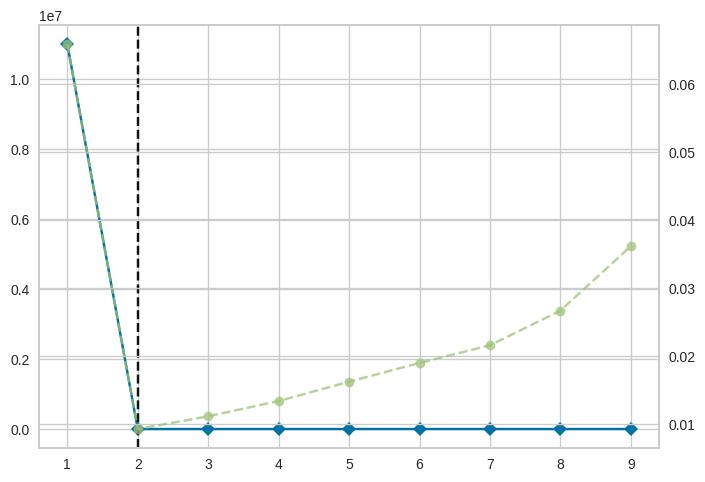

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer #라이브러리 불러오기

numpy_array = df1.values
#옐로우브릭 패키지는 넘파이 배열을 사용하므로, 데이터프레임을 넘파이 배열로 변환
model = KMeans()   #kmeans 알고리즘을 이용해 모델 생성

#시각화 함수 이용해 그래프로 시각화
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(numpy_array.reshape(-1,1))

# 4단계

In [ ]:
from sklearn.cluster import KMeans                   #K-means 군집을 위한 모듈 불러오기
kmeans = KMeans(n_clusters=2, random_state=0)          #군집의 개수는 2개로 설정함.
clus_model = kmeans.fit(df1)                            #fit()을 이용해 데이터 학습

In [ ]:
df1['group'] = clus_model.labels_  #군집 결과를 저장할 열을 'group'으로 추가

In [ ]:
df1.head()                          #결과 확인

,위도,경도,group
0,37.575794,126.971451,0
1,37.575947,126.974060,0
2,37.571770,126.974663,0
3,37.572559,126.978332,0
4,37.570000,126.971100,0


In [ ]:
df1.groupby('group').count()  #그룹별 데이터 갯수 확인

,위도,경도
group,,
0,1250,1250
1,1499,1499


In [ ]:
df1.groupby('group').mean()   #그룹별(군집별) 평균값을 구해 중심점 찾기

,위도,경도
group,,
0,37.534555,126.903564
1,37.557585,127.064734


In [ ]:
df2 = df1.groupby('group').mean()

In [ ]:
df2.head()

,위도,경도
group,,
0,37.534555,126.903564
1,37.557585,127.064734


# 5단계 : 성능 평가

In [ ]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(df1, df1['group'])
print("실루엣 점수:", silhouette_avg)

실루엣 점수: 0.9143281769153793


# 미사용) 그룹별 특징 분석해보기

**groupby 를 통해 다양한 통계량을 알 수 있습니다.**




count() 메소드를 통해 각 클러스터(그룹)별로 해당하는 데이터의 갯수가 몇 개인지 셉니다.

질문 1 ) 그룹 0의 데이터 갯수는 몇개인가요?

질문 2 ) 데이터 갯수가 많은 순서대로 그룹 번호를 나열해 보세요.

mean() 메소드를 통해 각 클러스터(그룹) 별 평균값을 알 수 있습니다.

질문 1) 그룹 0의 속성별 특징을 찾아봅시다.

질문 2) 그룹 1의 속성별 특징을 찾아봅시다.

질문 3) 그룹 2의 속성별 특징을 찾아봅시다.

질문 4) 그룹 3의 속성별 특징을 찾아봅시다.

질문 5) 분석 결과를 활용해 여행 경제 활성화를 시키는 방법은 무엇일지 친구들과 토의해 봅시다.